In [5]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [6]:
x_min, x_max = -0.022, 0.024
y_min, y_max = -0.017, 0.018

In [21]:
centroid_file = '/home/jensv/rsx/jens_analysis/output/centroid_fitting/2016-08-12/field_nulls.txt'
field_nulls = np.loadtxt(centroid_file)

In [32]:
np.where(np.logical_and(np.logical_and(x_min < field_nulls[:, 0], x_max > field_nulls[:, 0]),
                        np.logical_and(y_min < field_nulls[:, 1], y_max > field_nulls[:, 1])))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
        229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
        242, 243, 244, 245, 246, 247, 248, 249]),)

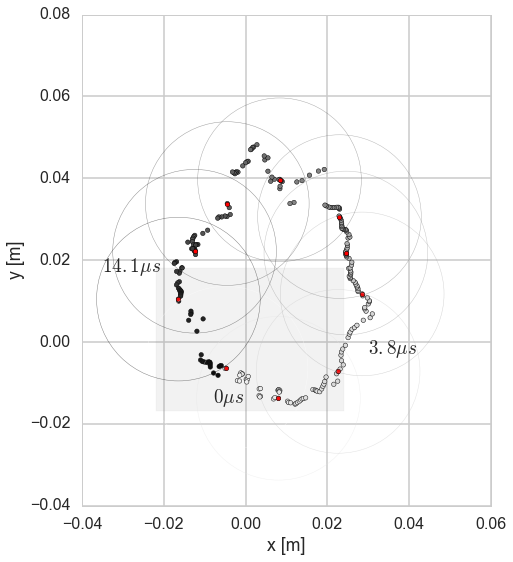

In [76]:
centroid_file = '/home/jensv/rsx/jens_analysis/output/centroid_fitting/2016-08-12/field_nulls.txt'
field_nulls = np.loadtxt(centroid_file)

x_min, x_max = -0.022, 0.024
y_min, y_max = -0.017, 0.018

fig, axes = plt.subplots(1, 1)
measurement_box = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min,
                                    color='grey', alpha=0.1)
axes.add_patch(measurement_box)
colormap = np.linspace(0, 1, 250)
axes.scatter(field_nulls[:, 0], field_nulls[:, 1], c=colormap)

axes.set_xlabel('x [m]')
axes.set_ylabel('y [m]')
axes.set_aspect('equal')

axes.text(-0.008, -0.015, r'$0 \mu s$')
axes.text(0.03, -0.003, r'$%2.1f \mu s$' % (0.068*56))
axes.text(-0.035, 0.017, r'$%2.1f \mu s$' % (0.068*208))

step = 25
for i, field_null in enumerate(field_nulls[::step]):
    colormap = np.linspace(1, 0, np.round(250./step))
    circle = patches.Circle(field_null, radius=0.02, facecolor='none', 
                            edgecolor=str(colormap[i]), alpha=0.5)
    axes.scatter(field_null[0], field_null[1], c='red')
    axes.add_patch(circle)

plt.show()